In [1]:
import sys
sys.path.insert(0, '/home/cameron/Projects/hypso-package')

## Download Multiple NetCDF Files

In [2]:
# Download Files to relative folder  
from hypso import download_nc_files
            
download_nc_files(filename_list=["tibet_2022-09-29_0446Z.nc", "xaafuun_2023-09-11_0623Z-l1a.nc","vancouver_2023-05-25_1831Z-l1a.nc"],
                  download_dir="/home/cameron/Nedlastinger/")

Download Failed. HTTP Error 404: Not Found
Deleting tibet_2022-09-29_0446Z.nc
Download Failed. HTTP Error 404: Not Found
Deleting xaafuun_2023-09-11_0623Z-l1a.nc
Download Failed. HTTP Error 404: Not Found
Deleting vancouver_2023-05-25_1831Z-l1a.nc


## Read NetCDF File

In [3]:
# Import Satellite Object
from hypso import Hypso1
import os

# Define HYPSO Image File and the .points from QGIS (if available)
dir_path = '/home/cameron/Dokumenter/Data/erie'
nc_file = os.path.join(dir_path, 'erie_2022-07-20_1539Z-l1a.nc')
points_file = os.path.join(dir_path, 'erie_2022-07-20_1539Z-bin3.points')

# Create Satellite Object
satobj = Hypso1(hypso_path=nc_file, points_path=points_file, verbose=True)

[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running georeferencing...
No image mode provided. Detected image mode: bin3


## Get L1A datacube

In [4]:
l1a_cube = satobj.get_l1a_cube()

In [5]:
l1a_cube

<xarray.DataArray (x: 956, y: 684, band: 120)>
array([[[  798,  1371,  2267, ...,  6133,  6129,  6109],
        [  803,  1395,  2266, ...,  6089,  6036,  5969],
        [  789,  1389,  2295, ...,  6039,  5993,  6023],
        ...,
        [  845,  1477,  2530, ..., 10410, 10330, 10207],
        [  849,  1499,  2568, ..., 10492, 10325, 10163],
        [  851,  1485,  2562, ..., 10312, 10183, 10027]],

       [[  797,  1368,  2238, ...,  6203,  6238,  6164],
        [  799,  1361,  2272, ...,  6075,  6099,  6042],
        [  824,  1397,  2307, ...,  5998,  6098,  5985],
        ...,
        [  859,  1511,  2593, ..., 10166,  9997,  9933],
        [  864,  1492,  2548, ..., 10228, 10063, 10001],
        [  874,  1503,  2559, ..., 10241, 10038,  9919]],

       [[  800,  1393,  2286, ...,  6657,  6662,  6501],
        [  809,  1395,  2280, ...,  6537,  6481,  6364],
        [  830,  1372,  2255, ...,  6518,  6455,  6359],
        ...,
...
        ...,
        [  838,  1523,  2527, ..., 11201, 11016, 10895],
        [  816,  1483,  2543, ..., 11099, 10873, 10805],
        [  847,  1523,  2524, ..., 10900, 10782, 10614]],

       [[  781,  1342,  2231, ..., 10345, 10113,  9837],
        [  787,  1353,  2249, ..., 10295, 10171,  9778],
        [  784,  1355,  2245, ..., 10508, 10248,  9933],
        ...,
        [  900,  1591,  2650, ..., 10941, 10844, 10652],
        [  907,  1576,  2639, ..., 10837, 10796, 10594],
        [  887,  1567,  2636, ..., 10762, 10604, 10461]],

       [[  786,  1340,  2204, ..., 10118,  9993,  9658],
        [  785,  1357,  2235, ..., 10099,  9841,  9585],
        [  781,  1342,  2250, ..., 10313, 10069,  9769],
        ...,
        [  946,  1699,  2870, ..., 11082, 10919, 10855],
        [  952,  1740,  2813, ..., 11107, 10950, 10822],
        [  958,  1729,  2846, ..., 10958, 10741, 10741]]], dtype=uint16)
Dimensions without coordinates: x, y, band
Attributes:
    level:        L1a
    units:        a.u.
    description:  Raw sensor values

## Generate L1B datacube

In [6]:
satobj.generate_l1b_cube()

l1b_cube = satobj.get_l1b_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...


In [7]:
l1b_cube

<xarray.DataArray (x: 956, y: 684, band: 120)>
array([[[  0.        ,   0.        ,   0.        , ...,  72.46485463,
          74.49313299,  75.65102673],
        [  0.        ,   0.        ,   0.        , ...,  72.37616585,
          72.92550494,  73.97364711],
        [  0.        ,   0.        ,   0.        , ...,  71.56674152,
          72.65959799,  75.82938669],
        ...,
        [  0.        ,   0.        ,   0.        , ..., 139.86054295,
         142.82130098, 145.95746574],
        [  0.        ,   0.        ,   0.        , ..., 143.03262666,
         145.00812349, 146.79141029],
        [  0.        ,   0.        ,   0.        , ..., 136.74322063,
         139.0869445 , 140.69765335]],

       [[  0.        ,   0.        ,   0.        , ...,  73.41444797,
          75.88057519,  75.18850354],
        [  0.        ,   0.        ,   0.        , ...,  72.32606914,
          74.10947712,  73.70834478],
        [  0.        ,   0.        ,   0.        , ...,  71.54664685,
          74.19714583,  71.94254481],
...
        [  0.        ,   0.        ,   0.        , ..., 147.04039196,
         149.96777561, 152.32230127],
        [  0.        ,   0.        ,   0.        , ..., 147.75213487,
         151.73421556, 152.91379029],
        [  0.        ,   0.        ,   0.        , ..., 142.75719182,
         144.86785363, 146.86715414]],

       [[  0.        ,   0.        ,   0.        , ..., 119.52916362,
         121.16877576, 117.08984828],
        [  0.        ,   0.        ,   0.        , ..., 119.45592213,
         119.04580184, 117.59968736],
        [  0.        ,   0.        ,   0.        , ..., 122.01703813,
         121.63283219, 120.32912539],
        ...,
        [  0.        ,   0.        ,   0.        , ..., 148.96432752,
         150.9863534 , 155.41783804],
        [  0.        ,   0.        ,   0.        , ..., 151.44899014,
         153.87434197, 156.36642718],
        [  0.        ,   0.        ,   0.        , ..., 145.34260359,
         146.75907429, 150.92889983]]])
Dimensions without coordinates: x, y, band
Attributes:
    level:        L1b
    units:        $mW\cdot  (m^{-2}  \cdot sr^{-1} nm^{-1})$
    description:  Radiance

## Generate L2A datacube

In [8]:
satobj.generate_l2a_cube(product='6sv1')

l2a_cube = satobj.get_l2a_cube(product='6sv1')

[INFO] Running 6SV1 atmospheric correction
[INFO] Calibration has already been run. Skipping.
[INFO] Running geometry computation...
ECI position samples: 1631
Quaternion samples: 1631
ADCS time range: 1658330880.000000 to 1658331778.250000
Frame time range: 1658331554.791878 to 1658331598.200969
173 sample(s) inside frame time range
Interpolating 956 frames
Spatial dimensions: 956 frames/lines, 684 pixels/samples
Computing pixel latitude and longitude coordinates...
Interpolating pixel coordinate gaps...
Using geometry-computed latitude and longitude values
Computing local angles (sun and satellite azimuth and zenith angles)...
Image Center (lat,lon): (41.82761	-83.08504)
Image Center elevation angle: 63.52887
Image Center off-nadir angle: 32.72877

-------  Py6S Atmospheric Correction  ----------
ROI:
Max Lat: 43.12644389364998  Min Lat: 40.36988390355103
Max Lon: -82.67700617437025  Min Lon: -84.15470201879344


100%|██████████| 120/120 [00:58<00:00,  2.06it/s]


In [9]:
l2a_cube

<xarray.DataArray (x: 956, y: 684, band: 120)>
array([[[-0.33597375, -0.3145017 , -0.30303441, ...,  0.24339164,
          0.25051475,  0.26009659],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.24307098,
          0.24485557,  0.25392144],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.24014441,
          0.24389564,  0.26075321],
        ...,
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.48706831,
          0.49718134,  0.5189246 ],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.49853734,
          0.50507583,  0.5219947 ],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.47579728,
          0.48370021,  0.49956098]],

       [[-0.33597375, -0.3145017 , -0.30303441, ...,  0.246825  ,
          0.25552346,  0.25839384],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.24288985,
          0.24912974,  0.25294475],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.24007176,
          0.24944623,  0.24644408],
...
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.51302786,
          0.52298032,  0.54235627],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.51560125,
          0.52935721,  0.5445338 ],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.49754147,
          0.50456946,  0.52227355]],

       [[-0.33597375, -0.3145017 , -0.30303441, ...,  0.41355793,
          0.41901512,  0.41265058],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.41329312,
          0.41135113,  0.41452751],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.42255312,
          0.42069038,  0.42457574],
        ...,
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.51998407,
          0.52665741,  0.55375227],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.52896764,
          0.53708313,  0.55724443],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.50688932,
          0.51139681,  0.53722657]]])
Dimensions without coordinates: x, y, band
Attributes:
    level:        L2a
    units:        a.u.
    description:  Reflectance (Rrs)
    correction:   6sv1

## Get TOA Reflectance from TOA Radiance (L2A)

In [10]:
satobj.generate_toa_reflectance()

toa_rrs_cube = satobj.get_toa_reflectance()

[INFO] Calibration has already been run. Skipping.
[INFO] Geometry computation has already been run. Skipping.


In [11]:
toa_rrs_cube

<xarray.DataArray (x: 956, y: 684, band: 120)>
array([[[0.        , 0.        , 0.        , ..., 0.23598729,
         0.58104662, 0.80949821],
        [0.        , 0.        , 0.        , ..., 0.23570139,
         0.56882619, 0.79155937],
        [0.        , 0.        , 0.        , ..., 0.23306827,
         0.56675904, 0.81142677],
        ...,
        [0.        , 0.        , 0.        , ..., 0.45355856,
         1.10934006, 1.55526484],
        [0.        , 0.        , 0.        , ..., 0.46384108,
         1.1263153 , 1.56413639],
        [0.        , 0.        , 0.        , ..., 0.44344098,
         1.08031386, 1.4991903 ]],

       [[0.        , 0.        , 0.        , ..., 0.23907596,
         0.59185938, 0.80453639],
        [0.        , 0.        , 0.        , ..., 0.23553455,
         0.57805221, 0.7887081 ],
        [0.        , 0.        , 0.        , ..., 0.23299917,
         0.57874313, 0.7698228 ],
...
        [0.        , 0.        , 0.        , ..., 0.47094094,
         1.15043293, 1.60299871],
        [0.        , 0.        , 0.        , ..., 0.47321614,
         1.16397289, 1.60920851],
        [0.        , 0.        , 0.        , ..., 0.45721425,
         1.11128985, 1.54556163]],

       [[0.        , 0.        , 0.        , ..., 0.38441454,
         0.93336218, 1.23732859],
        [0.        , 0.        , 0.        , ..., 0.3841837 ,
         0.91702018, 1.24273148],
        [0.        , 0.        , 0.        , ..., 0.3924253 ,
         0.93695966, 1.27159016],
        ...,
        [0.        , 0.        , 0.        , ..., 0.4770975 ,
         1.15823349, 1.63555672],
        [0.        , 0.        , 0.        , ..., 0.48505081,
         1.18037667, 1.6455241 ],
        [0.        , 0.        , 0.        , ..., 0.46548937,
         1.12578473, 1.58828752]]])
Dimensions without coordinates: x, y, band
Attributes:
    units:        a.u.
    description:  Top of atmosphere (TOA) reflectance

## Write L1b NetCDF

In [12]:
satobj.write_l1b_nc_file()

## Print Contents of .nc file

In [13]:
from hypso.utils import print_nc

# Print Attributes and Groups of .nc file generated
print_nc(nc_file=satobj.l1b_nc_file)

--- GROUP: "/" ---
DIMENSIONS: lines (956), samples (684), bands (120), adcssamples (1631), radrows (684), radcols (120), specrows (120), 
GROUP ATTRIBUTES: instrument, institution, resolution, location_description, license, naming_authority, date_processed, date_aquired, publisher_name, publisher_url, processing_level, target_coords, radiometric_file, spectral_file, md5sum, byte_size_compressed_cube, warnings, smile_file, destriping, 
VARIABLES: 
VAR ATTRIBUTES: 
SUB-GROUPS: logfiles, products, metadata, navigation, 

  --- GROUP: "/logfiles" ---
  DIMENSIONS: 
  GROUP ATTRIBUTES: 
  VARIABLES: 
  VAR ATTRIBUTES: 
  SUB-GROUPS: 

  --- GROUP: "/products" ---
  DIMENSIONS: 
  GROUP ATTRIBUTES: 
  VARIABLES: Lt (lines, samples, bands), 
  VAR ATTRIBUTES: 

      Lt
      ---units: W/m^2/micrometer/sr
      ---long_name: Top of Atmosphere Measured Radiance
      ---wavelength_units: nanometers
      ---fwhm (120,): [5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.

## Compare L1A and L1B NetCDF files

In [14]:
from hypso.utils import compare_netcdf_files

summary_l1a_l1b = compare_netcdf_files(satobj.l1a_nc_file, satobj.l1b_nc_file)
summary_l1a_l1b.head(10)

,label,presence,validator,erie_2022-07-20_1539Z-l1a.nc,erie_2022-07-20_1539Z-l1b.nc
0,"(/, dimensions, adcssamples)",Present in Both,equal,1631,1631
1,"(/, dimensions, bands)",Present in Both,equal,120,120
2,"(/, dimensions, lines)",Present in Both,equal,956,956
3,"(/, dimensions, radcols)",Present in Both,different,1936,120
4,"(/, dimensions, radrows)",Present in Both,different,1216,684
5,"(/, dimensions, samples)",Present in Both,equal,684,684
6,"(/, dimensions, specrows)",Present in Both,different,4,120
7,"(/, group_attributes, byte_size_compressed_cube)",Present in Both,equal,80926339,80926339
8,"(/, group_attributes, date_aquired)",Present in Both,equal,2022-07-20T15:39:14.755850Z,2022-07-20T15:39:14.755850Z
9,"(/, group_attributes, date_processed)",Present in Both,equal,2023-11-28T06:37:28.566739Z,2023-11-28T06:37:28.566739Z


## Get L1a Spectrum

In [15]:
lat = satobj.latitudes[200,500]
lon = satobj.longitudes[200,500]

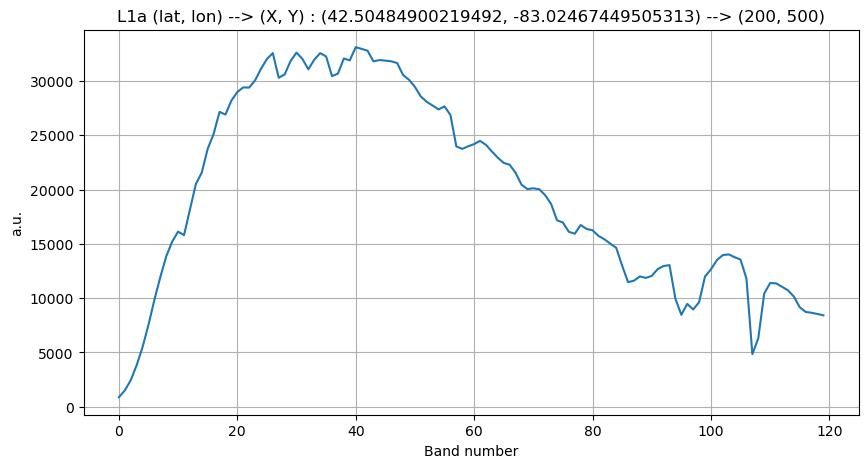

In [16]:
l1a_spectrum = satobj.get_l1a_spectrum(latitude=lat, longitude=lon)

satobj.plot_l1a_spectrum(latitude=lat, longitude=lon)



In [17]:
l1a_spectrum

<xarray.DataArray (band: 120)>
array([  882,  1507,  2444,  3824,  5496,  7551,  9850, 11945, 13854,
       15202, 16130, 15803, 18155, 20500, 21567, 23747, 25114, 27155,
       26908, 28193, 28978, 29407, 29391, 30053, 31111, 32018, 32570,
       30297, 30602, 31840, 32612, 32030, 31074, 31960, 32563, 32258,
       30448, 30676, 32071, 31897, 33108, 32957, 32787, 31806, 31925,
       31873, 31810, 31653, 30547, 30114, 29460, 28567, 28081, 27735,
       27381, 27656, 26868, 23977, 23747, 23987, 24190, 24484, 24120,
       23508, 22935, 22456, 22290, 21549, 20455, 20047, 20118, 20036,
       19485, 18680, 17172, 16965, 16110, 15935, 16734, 16376, 16256,
       15739, 15426, 15020, 14643, 13002, 11477, 11613, 12005, 11868,
       12052, 12673, 12959, 13046,  9946,  8470,  9474,  8959,  9631,
       11996, 12659, 13500, 13967, 14036, 13773, 13553, 11798,  4847,
        6320, 10427, 11397, 11366, 11053, 10729, 10160,  9164,  8738,
        8655,  8547,  8422], dtype=uint16)
Dimensions without coordinates: band
Attributes:
    level:        L1a
    units:        a.u.
    description:  Raw sensor values

## Get L1b Spectrum

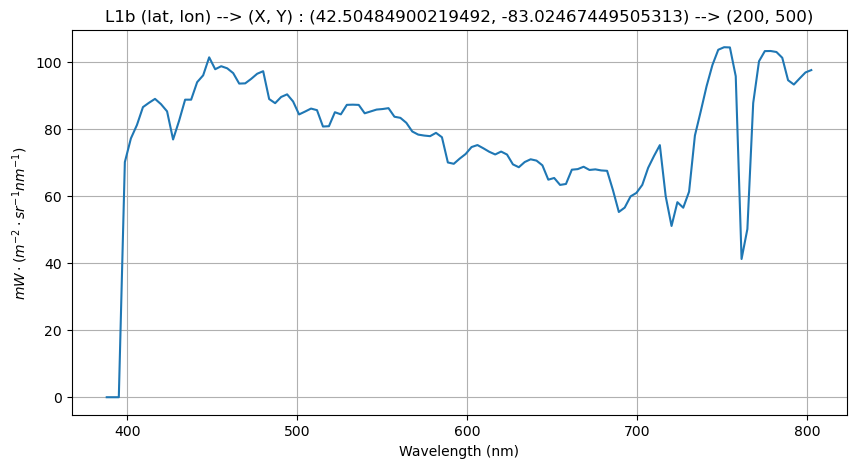

In [18]:
l1b_spectrum = satobj.get_l1b_spectrum(latitude=lat, longitude=lon)

satobj.plot_l1b_spectrum(latitude=lat, longitude=lon)

## Get L2a Spectrum

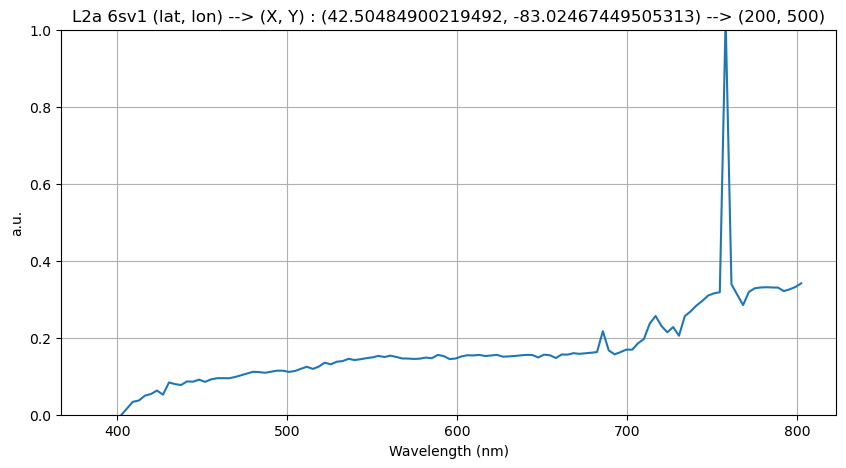

In [19]:
l2a_spectrum = satobj.get_l2a_spectrum(latitude=lat, longitude=lon, product="6sv1")

satobj.plot_l2a_spectrum(latitude=lat, longitude=lon, product="6sv1")

## Create Land Mask

In [20]:
satobj.generate_land_mask(land_mask="global")
satobj.generate_land_mask(land_mask="ndwi")
satobj.generate_land_mask(land_mask="threshold")

[INFO] Running land mask generation...
[INFO] Georeferencing has already been run. Skipping.
[INFO] Running NDWI land mask generation...
[INFO] Calibration has already been run. Skipping.
Loading configuration file /home/cameron/Projects/hypso-package/hypso/classification/WaterDetection/WaterDetect.ini
File /home/cameron/Projects/hypso-package/hypso/classification/WaterDetection/WaterDetect.ini verified.
[['ndwi', 'Nir'], ['otsu', 'ndwi']]
maxndwi
Selection of best number of clusters using Calinski-Harabasz Index:
k=2 :Calinski_harabaz index=16668.868338604407
k=3 :Calinski_harabaz index=13491.07681066755
k=4 :Calinski_harabaz index=29065.077850290978
k=5 :Calinski_harabaz index=23504.695844034206
k=6 :Calinski_harabaz index=19471.43328074263
k=7 :Calinski_harabaz index=41507.87195742762
Applying clusters based naive bayes classifier
Assgnin 1 to cluster_id 2
Skipping cluster_id 2
[INFO] Running threshold land mask generation...
[INFO] Calibration has already been run. Skipping.


In [21]:
import matplotlib.pyplot as plt

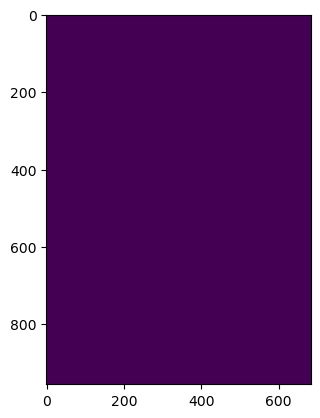

In [29]:
land_mask = satobj.get_land_mask(land_mask="global")
plt.imshow(land_mask)

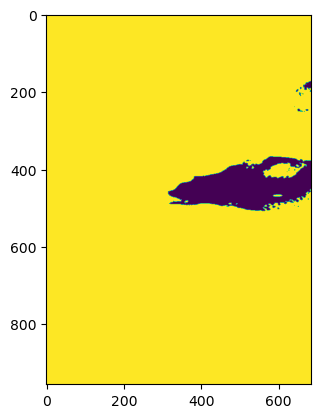

In [27]:
land_mask = satobj.get_land_mask(land_mask="ndwi")
plt.imshow(land_mask)

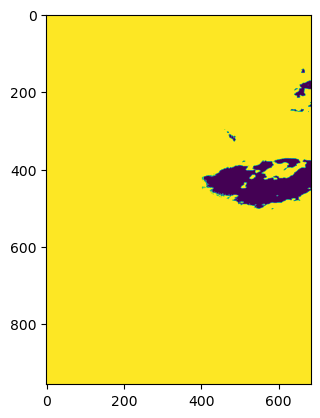

In [32]:
land_mask = satobj.get_land_mask(land_mask="threshold")
plt.imshow(land_mask)

## Create Cloud Mask

In [ ]:
# TODO

## Set Active Land Mask

In [34]:
satobj.set_active_land_mask(land_mask="ndwi")

In [ ]:
land_mask = satobj.get_active_land_mask()
plt.imshow(land_mask)

## Set Active Cloud Mask

In [35]:
# TODO

## Get Active Mask

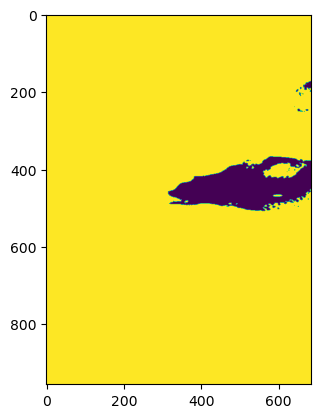

In [36]:
land_mask = satobj.get_active_mask()
plt.imshow(land_mask)

## Get Band Ratio Chlorophyll Estimates (band ratio)

In [39]:
satobj.generate_chlorophyll_estimates(product="band_ratio")
chl = satobj.get_chlorophyll_estimates(product="band_ratio")

[INFO] Chlorophyll estimation has already been run. Skipping.


In [ ]:
plt.imshow(chl)

In [40]:
chl

<xarray.DataArray (x: 956, y: 684)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: x, y
Attributes:
    units:        a.u.
    description:  Chlorophyll concentration
    method:       549 nm over 663 nm band ratio
    factor:       0.1

## Get Band Ratio Chlorophyll Estimates (6SV1 AQUA Tuned)

In [41]:
model = "/home/cameron/Dokumenter/Chlorophyll_NN_Models/model_6sv1_aqua_tuned.joblib"
satobj.generate_chlorophyll_estimates(product="6sv1_aqua", model=model)
chl = satobj.get_chlorophyll_estimates(product="6sv1_aqua")

[INFO] Chlorophyll estimation has already been run. Skipping.


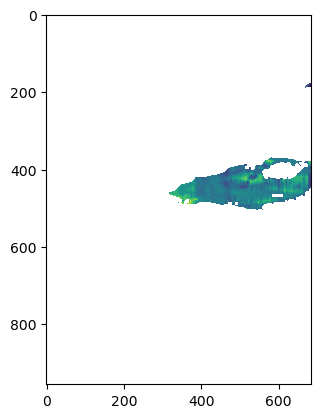

In [48]:
plt.imshow(chl)

## Get Band Ratio Chlorophyll Estimates (ACOLITE AQUA Tuned)

In [49]:
# TODO